# Simple modifications of the mach zehnder notebook to calculate with fixed $\theta_{i},i=1,2$ to speed things up a little since here we only care about the values of $\theta$ and $\beta$

In [159]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.plotting import plot3d,plot
from mpl_toolkits.mplot3d import Axes3D
init_printing(use_unicode=True)

In [7]:
jones1= Matrix([0,1])
jones0= Matrix([1,0])

In [54]:
theta=Symbol('theta',real=True)
beta=Symbol('beta',real=True)
def N_mach(N,k):
    if k==1:
        lista=list()
        K=symarray('theta', N+1,real=True)
        for i in range(1,N+1):
            l=i
            BS=Matrix([[cos(K[i]),I*sin(K[i])],[I*sin(K[i]),cos(K[i])]])
            lista.append(BS)
    else:
        t=np.pi/(2)
        lista=Matrix([[cos(t/N),I*sin(t/N)],[I*sin(t/N),cos(t/N)]])
    return lista

def N_mach_zehnder(N,k):
    K=N_mach(N,k)
    jones1= Matrix([0,1])
    jones0= Matrix([1,0])
    M1=Matrix([[1,0],[0,1]])
    A=Matrix([[ 1,0],[0,beta*exp(I*theta)]])
    r=jones0
    if k==1:
        for i in range(0,N):
            if i==N-1:
                r=simplify(K[i]*r)
            else:
                r=simplify(M1*A*K[i]*r)
    else:
        r=K*(M1*A*K)**(N-1)*r
    return r
        

def N_Interferomemer(N,k):
    r=N_mach_zehnder(N,k)
    p1=jones0.T*r
    p1=p1[0]*conjugate(p1[0])
    p1=re(p1)
    p2=jones1.T*r
    p2=p2[0]*conjugate(p2[0])
    p2=re(p2)
    pabs=1-p1-p2
    K=symarray('theta', N+1,real=True)
    return pabs,p1,p2,K

In [88]:
pabs,pd1,pd2,K=N_Interferomemer(3,2)

In [91]:
pd1.subs(beta,0)

In [48]:
def con_barra(plot):
    plot2 = plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    backend = plot2.backend(plot2)
    backend.ax = ax
    backend._process_series(backend.parent._series, ax, backend.parent)
    plt.close(backend.fig)
    ax.collections[0].set_cmap('viridis') # optionally change the colormap
    plt.colorbar(ax.collections[0],ticks=[0.2,0.4,0.6,0.8,0.99])
    plt.yticks(np.arange(-np.pi/2,3*np.pi /2 +1, step=np.pi/2),[r'$-\pi$',r'$-\frac{\pi}{2}$',0,r'$\frac{\pi}{2}$',r'$\pi$'])
    return plt.show()


<IPython.core.display.Javascript object>


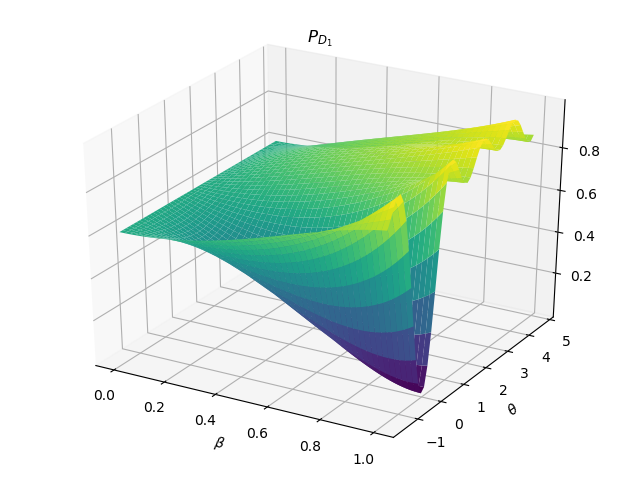

<IPython.core.display.Javascript object>


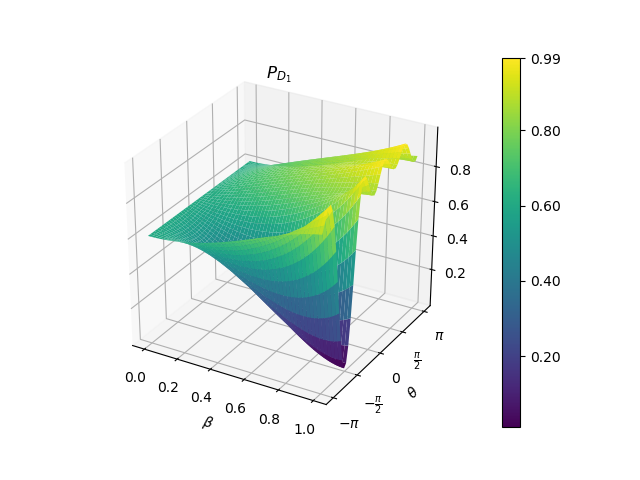

<IPython.core.display.Javascript object>


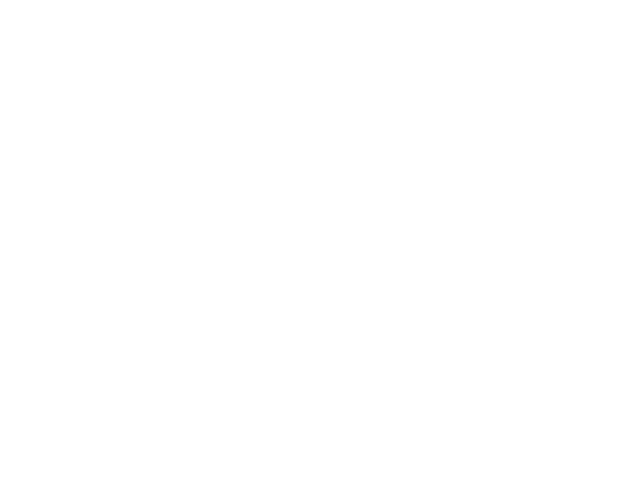

In [49]:
con_barra(plot3d(pd1,(beta,0,1),(theta,-np.pi/2,3*np.pi/2),
                 xlabel=r'$\beta$',ylabel=r'$\theta$',title='$P_{D_{1}}$'))

<IPython.core.display.Javascript object>


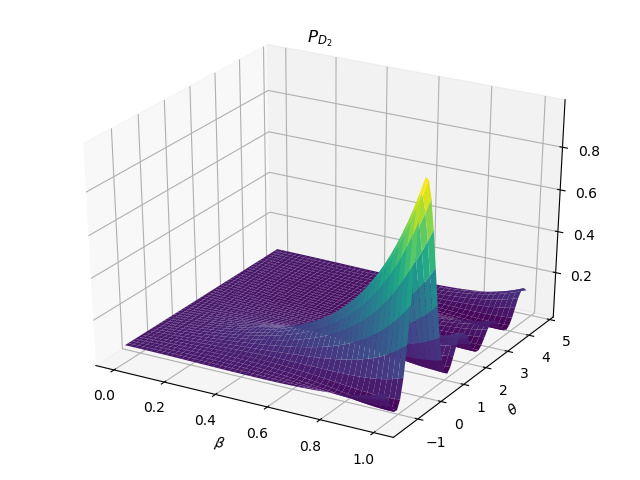

<IPython.core.display.Javascript object>


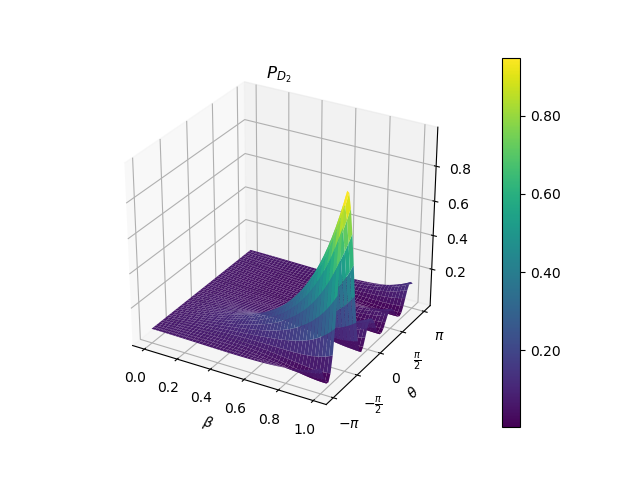

<IPython.core.display.Javascript object>


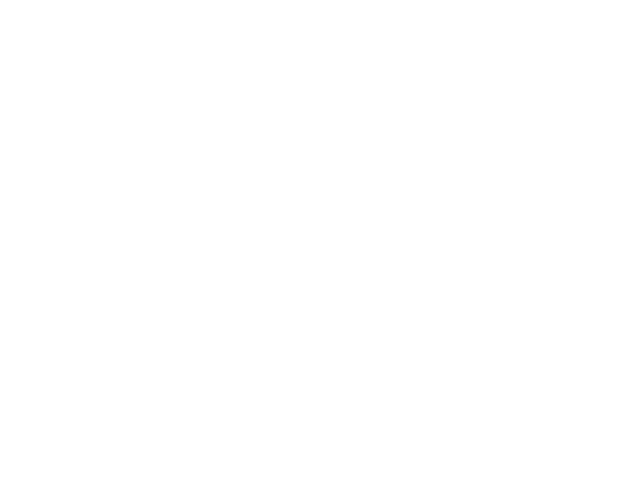

In [50]:
con_barra(plot3d(pd2,(beta,0,1),(theta,-np.pi/2,3*np.pi/2),
                 xlabel=r'$\beta$',ylabel=r'$\theta$',title='$P_{D_{2}}$'))

<IPython.core.display.Javascript object>


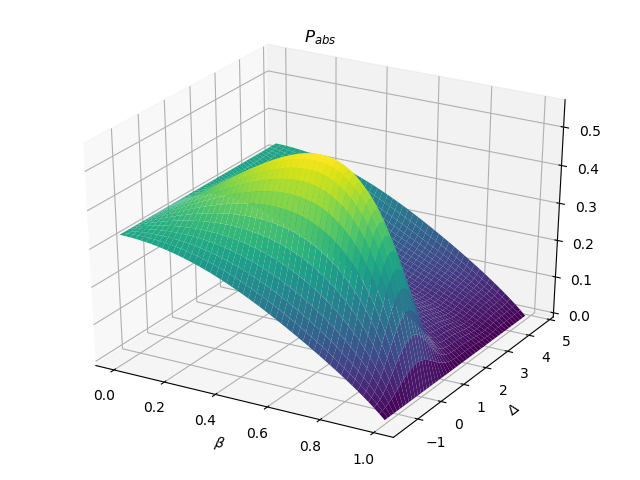

<IPython.core.display.Javascript object>


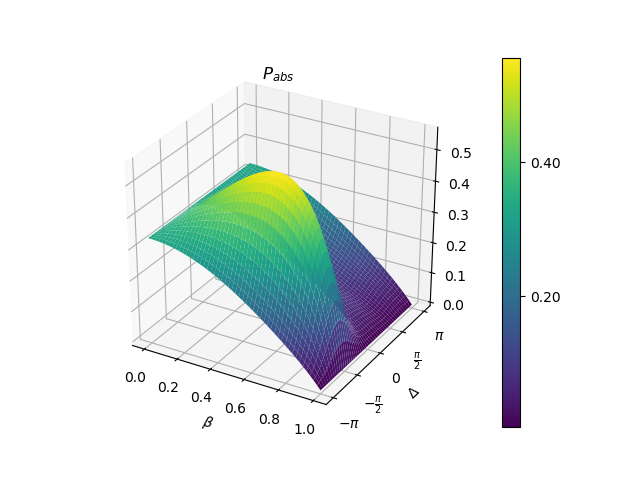

<IPython.core.display.Javascript object>


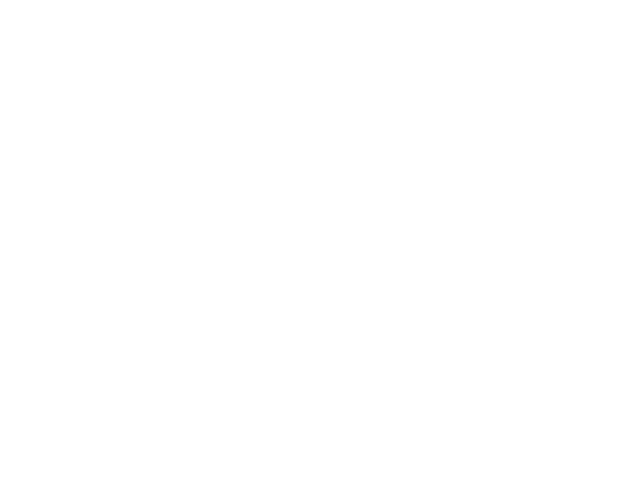

In [51]:
con_barra(plot3d(pabs,(beta,0,1),(theta,-np.pi/2,3*np.pi/2),
                 xlabel=r'$\beta$',ylabel=r'$\Delta$',title='$P_{abs}$'))

In [106]:
M1=Matrix([[0,exp(I*beta)],[1,0]])
M2=Matrix([[0,1],[exp(I*theta),0]])
M1*M2

⎡ ⅈ⋅β  ⅈ⋅θ   ⎤
⎢ℯ   ⋅ℯ     0⎥
⎢            ⎥
⎣    0      1⎦

In [62]:
12*14

In [64]:
168/2

In [65]:
6*13

In [66]:
6*84

In [69]:
a=1/84
b=1/12
c=1/14

In [70]:
a+b+c

In [140]:
pabs,pd1,pd2,K=N_Interferomemer(3,1)

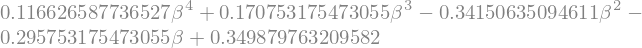

In [158]:
pd1.subs({theta:0,K[1]:pi/4,K[2]:pi/12,K[3]:pi/6}).evalf()

In [155]:
pd2.subs({beta:0.1,theta:0,K[1]:pi/4,K[2]:pi/6,K[3]:pi/12}).evalf()

In [154]:
pabs.subs({beta:0.1,theta:0,K[1]:pi/4,K[2]:pi/6,K[3]:pi/12}).evalf()

In [121]:
27/64

In [164]:
from sympy.utilities.lambdify import lambdify, implemented_function


In [166]:
kaka=lambdify(beta,pd1.subs({theta:0,K[1]:pi/4,K[2]:pi/12,K[3]:pi/6}).evalf())


In [169]:
kaka(0)

In [170]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


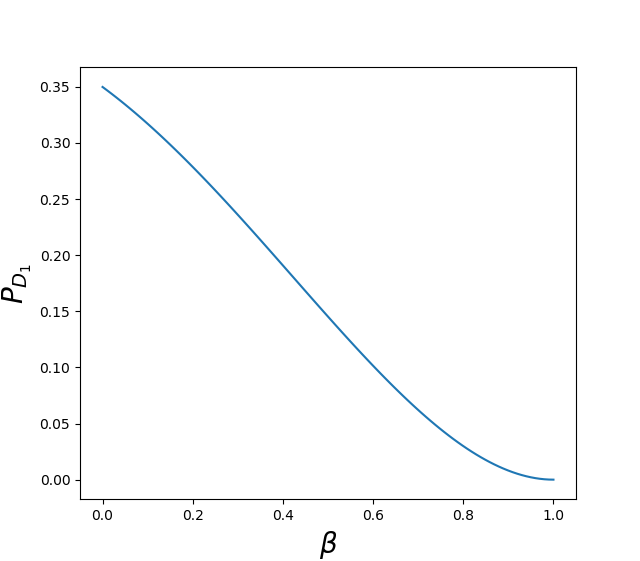

Text(0.5, 0, '$\\beta$')

In [178]:
x=np.linspace(0,1,100)
plt.plot(x,kaka(x))
plt.ylabel(r'$P_{D_{1}}$',fontsize=20)
plt.xlabel(r'$\beta$',fontsize=20)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747